In [1]:
import os, warnings
# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

In [2]:
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import mglearn 
import seaborn as sns 

In [6]:
# 데이터 셋 준비
X, y=mglearn.datasets.make_wave(n_samples=100)
line=np.linspace(-3, 3, 1000, endpoint=False).reshape(-1,1)
# reshape에서 (-1, n) 이란 -> 행을 n줄로 하고 열 수는 그에 알아서 맞추라

In [7]:
print(X.shape)
print(y.shape)

(100, 1)
(100,)


### 선형 회귀 모델, 의사결정트리 모델 학습 및 예측

In [9]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor

In [10]:
#모델 선택, 학습 및 예측
linear = LinearRegression().fit(X,y)
decision=DecisionTreeRegressor(min_samples_split=3).fit(X,y)

pred_linear=linear.predict(line) # 선형 모델로 예측
pred_tree=decision.predict(line) # 의사결정 트리로 예측

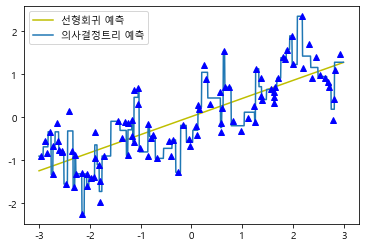

In [14]:
### 그래프 그려보기
plt.plot(line,pred_linear,'-',color='y',label='선형회귀 예측')
plt.plot(line,pred_tree,'-',label='의사결정트리 예측')
plt.legend(loc='best')

# 원래 데이터
plt.plot(X[:,0],y,'b^')

* 의사결정 트리는 학습용 데이터를 잘 예측함. 과적합 현상도 약간 있음. 


### 구간 분할을 적용

In [16]:
# -3~3
# 시작값과 끝값을 포함한 11개의 값 생성

bins=np.linspace(-3,3,11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

### 구간 나누기

In [17]:
from sklearn.preprocessing import KBinsDiscretizer

In [18]:
kb=KBinsDiscretizer(n_bins=10,strategy='uniform')
kb.fit(X)
print('bin edges : \n', kb.bin_edges_)

bin edges : 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [19]:
print(X.shape)
print(X[:5])
X_binned=kb.transform(X)
X_binned[:5].toarray()

(100, 1)
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
kb = KBinsDiscretizer(n_bins=10, strategy="uniform", encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)
X_binned[0:10]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

1. line은 1000여개의 값을 가짐(-3,3)
2. line의 값을 구간분할해서 구간의 값을 갖는다
3. 각각의 모델 훈련시 구간 분할한 값을 이용한다
4. 구간적용 된 새로운 데이터로 예측을 수행한다.

In [21]:
# 구간 분할
kb=KBinsDiscretizer(n_bins=10, strategy='uniform',encode='onehot-dense')
kb.fit(X)

#학습용 데이터를 kb를 이용해 생성, 구간 분할 적용된 값 생성
X_binned=kb.transform(X)

# 새로운 데이터에 대해 구간분할 적용
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
line_binned=kb.transform(line)

print(X_binned.shape, line_binned.shape)

(100, 10) (1000, 10)


NameError: name '용' is not defined

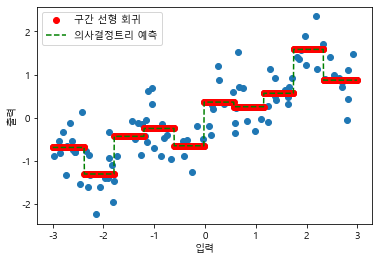

In [25]:
# 모델 선택, 훈련, 예측, 시각화
linear = LinearRegression().fit(X_binned, y)
decision = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)

pred_linear=linear.predict(line_binned)
pred_tree=decision.predict(line_binned)

plt.plot(X[:,0],y,'o')
plt.plot(line,pred_linear, 'ro',label='구간 선형 회귀')
plt.plot(line,pred_tree,'g--',label='의사결정트리 예측')

plt.xlabel('입력')
plt.ylabel('출력')
plt.legend(loc='best') # 레이블 달기